# Simple and Modified PageRank

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random as rn

# Creating Random Graph

In [2]:
def createGraph(n,p):
    g=nx.gnp_random_graph(n,p)
    draw=nx.draw(g,pos=nx.spring_layout(g),with_labels=True)
    Adj=nx.adjacency_matrix(g).todense().astype(float)
    print(Adj)
    for i in range(len(Adj)):
        if(np.all(Adj[i]==0)):
            pass
        else:
            Adj[i]=Adj[i]/np.sum(Adj[i])
    return(g,Adj)

/home/atul/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]]


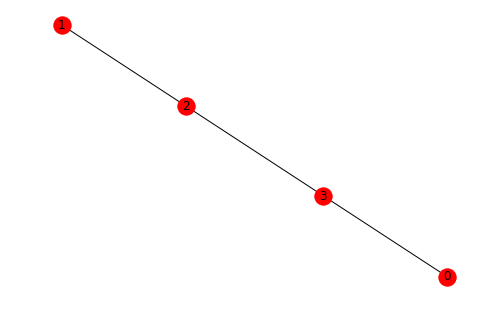

In [3]:
g,trans=createGraph(4,0.3)

In [4]:
trans #transition Matrix

matrix([[0. , 0. , 0. , 1. ],
        [0. , 0. , 1. , 0. ],
        [0. , 0.5, 0. , 0.5],
        [0.5, 0. , 0.5, 0. ]])

In [5]:
probMat=np.matrix([1/4,1/4,1/4,1/4]) #initial probability distribution matrix
probMat.shape

(1, 4)

# Simplified PageRank

In [6]:
def simplifiedPageRank(probMat,trans):
    maxiter=100
    for i in range(maxiter):
        probMat1=probMat.dot(trans)
        probMat2=probMat1.dot(trans)
        probMat=probMat2
        if(np.all((probMat1-probMat2)<0.0001)):
            break
    return(probMat)

In [7]:
simplifiedPageRank(probMat,trans)

matrix([[0.16668701, 0.16668701, 0.33331299, 0.33331299]])

# Modified PageRank

In [8]:
def modifiedPageRank(probMat,trans,c):
    maxiter=100
    jumpMat=np.matrix([1/probMat.shape[1]]*probMat.shape[1])
    for i in range(maxiter):
        probMat1=c*probMat.dot(trans) +(1-c)*jumpMat
        probMat2=c*probMat1.dot(trans) +(1-c)*jumpMat
        probMat=probMat2
        if(np.all((probMat1-probMat2)<0.0001)):
            break
    return(probMat)

In [9]:
modifiedPageRank(probMat,trans,0.8)

matrix([[0.17857892, 0.17857892, 0.32142108, 0.32142108]])